In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import wordpunct_tokenize
print(wordpunct_tokenize)
from nltk.tokenize import sent_tokenize,word_tokenize
import spacy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Udaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Udaan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Udaan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Udaan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!

<bound method RegexpTokenizer.tokenize of WordPunctTokenizer(pattern='\\w+|[^\\w\\s]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>


In [304]:
df = pd.read_excel('D:/NLP/amazon alexa/alexa reviwq.xlsx')
df

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1
...,...,...,...,...,...
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,2018-07-29,Black Dot,Good,1
3150,1,2018-07-29,Black Dot,It definitely has better speakers than Eco Dot...,1
3151,4,2018-07-29,Black Dot,Worst software!!! Not even 50% of answers were...,1


In [305]:
df['verified_reviews'][1009]

'Bought this for my daughter when she turned 9.  She loves it!!  I especially like the calling feature since she doesn’t have a cell phone.  She loves playing music and dancing and with Amazon music she can play all her favorite songs ...... sometimes over and over and over again lol!'

In [306]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [307]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
3150    It definitely has better speakers than Eco Dot...
3151    Worst software!!! Not even 50% of answers were...
3152    It definitely has better speakers than Eco Dot...
Name: verified_reviews, Length: 3153, dtype: object

In [308]:
df[['rating','feedback']].describe()

,rating,feedback
count,3153.000000,3153.00000
mean,4.461782,0.91849
std,1.069840,0.27366
min,1.000000,0.00000
25%,4.000000,1.00000
50%,5.000000,1.00000
75%,5.000000,1.00000
max,5.000000,1.00000


In [309]:
txt = df["verified_reviews"]
txt

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
3150    It definitely has better speakers than Eco Dot...
3151    Worst software!!! Not even 50% of answers were...
3152    It definitely has better speakers than Eco Dot...
Name: verified_reviews, Length: 3153, dtype: object

In [310]:
#loading english module
nlp = spacy.load("en_core_web_sm")

# Clean the data

In [311]:
import string,re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

In [312]:
def clean_data(df):
    df=word_tokenize(df)
    return " ".join(df)

In [313]:
def clean_text(df):
     df = word_tokenize(df) # Create tokens
     df= " ".join(df) # Join tokens
     df = [char for char in df if char not in string.punctuation] # Remove punctuations
     df = ''.join(df) # Join the leters
     df = [word for word in df.split() if word.lower() not in stopwords.words('english')] # Remove common englis
     return " ".join(df)

In [314]:
 # Apply the function to 'cleaned_text' to clean it
# Add cleaned data as a separate column to the DataFrame
df['cleaned_text']=df['verified_reviews'].apply(clean_text)

In [315]:
df['cleaned_text']

0                                               Love Echo
1                                                   Loved
2       Sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaurs contro...
4                                                   Music
                              ...                        
3148    complaint sound quality nt great mostly use co...
3149                                                 Good
3150    definitely better speakers Eco Dot Gen2 Google...
3151    Worst software even 50 answers matched questio...
3152    definitely better speakers Eco Dot Gen2 Google...
Name: cleaned_text, Length: 3153, dtype: object

In [ ]:
features = df['cleaned_text']
processed_features = []
for sentence in range(0, len(features)):
 # Remove all the special characters
 processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
 # Remove single characters appearing in the text except the start
 processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
 # Remove single characters appearing at the start
 processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
 # Substitute multiple spaces with a single space
 processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
 # Convert to lowercase
 processed_feature = processed_feature.lower()
 processed_features.append(processed_feature)


In [317]:
processed_features[:5]


['love echo',
 'loved',
 'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home',
 'lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well',
 'music']

In [318]:
df['processed_text'] = processed_features

In [319]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo,love echo
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved,loved
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...,sometimes playing game answer question correct...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learns dinosaurs contro...
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,music


In [320]:
processed_text_ngrams=list(nltk.ngrams(df['processed_text'], 8))


In [321]:
processed_text_ngrams

[('love echo',
  'loved',
  'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home',
  'lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well',
  'music',
  'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else',
  'without cellphone use many features ipad see use great alarm r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet',
  'think 5th one purchased working getting one every room house really like features offer specifily playing music echos controlling lights throughout house'),
 ('loved',
  'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home',
  'lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well',
  'm

In [322]:
processed_text_ngrams[:3]

[('love echo',
  'loved',
  'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home',
  'lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well',
  'music',
  'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else',
  'without cellphone use many features ipad see use great alarm r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet',
  'think 5th one purchased working getting one every room house really like features offer specifily playing music echos controlling lights throughout house'),
 ('loved',
  'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home',
  'lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well',
  'm

In [323]:
# #Apply porter stemmer technique to processed data and store stemmer(porter) data as a separate column
# to the DataFrame
#example deeper = deep  or making = make


In [324]:
# Stemming
from nltk.stem.porter import PorterStemmer
def get_stemmed_text(corpus):
 stemmer = PorterStemmer()
 return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]
df['stemmedtext(porter)'] = get_stemmed_text(df['processed_text'])


In [325]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text,stemmedtext(porter)
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo,love echo,love echo
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved,loved,love
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...,sometimes playing game answer question correct...,sometim play game answer question correctli al...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learn dinosaur control ...
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,music,music


In [326]:
# Apply Lancaster stemmer technique to processed data and store stemmer(lancaster) data as a separate
# column to the DataFrame


In [327]:
from nltk.stem import LancasterStemmer
def get_stemmed_text(corpus):
 stemmer = LancasterStemmer()
 return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]
df['stemmedtext(lancaster)'] = get_stemmed_text(df['processed_text'])

In [328]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster)
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo,love echo,love echo,lov echo
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved,loved,love,lov
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...,sometimes playing game answer question correct...,sometim play game answer question correctli al...,sometim play gam answ quest correct alex say g...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learn dinosa control li...
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,music,music,mus


In [329]:
# Apply Snowball stemmer technique to processed data and store stemmer(snowball) data as a separate
# column to the DataFrame

In [330]:
from nltk.stem import SnowballStemmer

In [331]:
def get_stemmed_text(corpus):
    stemmer = SnowballStemmer('english')
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]
df['stemmedtext(snowball)'] = get_stemmed_text(df['processed_text'])

In [332]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball)
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo,love echo,love echo,lov echo,love echo
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved,loved,love,lov,love
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...,sometimes playing game answer question correct...,sometim play game answer question correctli al...,sometim play gam answ quest correct alex say g...,sometim play game answer question correct alex...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learn dinosa control li...,lot fun thing 4 yr old learn dinosaur control ...
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,music,music,mus,music


In [333]:
#  Apply Lemmatization technique to processed data and store lemmatized data as a separate column to
# the DataFrame

In [334]:
from nltk.stem import WordNetLemmatizer
def get_lemmatized_text(corpus):
 lemmatizer = WordNetLemmatizer()
 return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]
df['lemmatext'] = get_lemmatized_text(df['processed_text'])


In [335]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo,love echo,love echo,lov echo,love echo,love echo
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved,loved,love,lov,love,loved
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...,sometimes playing game answer question correct...,sometim play game answer question correctli al...,sometim play gam answ quest correct alex say g...,sometim play game answer question correct alex...,sometimes playing game answer question correct...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learn dinosa control li...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learns dinosaur control...
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,music,music,mus,music,music


In [336]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatext']]
df.head()


,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo,love echo,love echo,lov echo,love echo,love echo,l o v e e c h o
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved,loved,love,lov,love,loved,l o v e d
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...,sometimes playing game answer question correct...,sometim play game answer question correctli al...,sometim play gam answ quest correct alex say g...,sometim play game answer question correct alex...,sometimes playing game answer question correct...,s o m e t i m e s p l a y i n g g a m e ...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learn dinosa control li...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learns dinosaur control...,l o t f u n t h i n g 4 y r o l d ...
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,music,music,mus,music,music,m u s i c


In [337]:
from textblob import TextBlob 


In [338]:
# Create a function to calculate Sentiment scores for each text
def generate_polarity(text):
 sentiment = TextBlob(text).sentiment
 return sentiment


In [339]:
sentiment = df['lemmatext'].apply(generate_polarity)
sentiment = sentiment.to_frame()
sentiment.head()

,lemmatext
0,"(0.5, 0.6)"
1,"(0.7, 0.8)"
2,"(0.0, 0.65625)"
3,"(0.2333333333333333, 0.48333333333333334)"
4,"(0.0, 0.0)"


In [340]:
df['sentiment_score'] = sentiment
df.head()


,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,sentiment_score
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo,love echo,love echo,lov echo,love echo,love echo,l o v e e c h o,"(0.5, 0.6)"
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved,loved,love,lov,love,loved,l o v e d,"(0.7, 0.8)"
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...,sometimes playing game answer question correct...,sometim play game answer question correctli al...,sometim play gam answ quest correct alex say g...,sometim play game answer question correct alex...,sometimes playing game answer question correct...,s o m e t i m e s p l a y i n g g a m e ...,"(0.0, 0.65625)"
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learn dinosa control li...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learns dinosaur control...,l o t f u n t h i n g 4 y r o l d ...,"(0.2333333333333333, 0.48333333333333334)"
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,music,music,mus,music,music,m u s i c,"(0.0, 0.0)"


In [341]:
# Calculate polarity for processed data and store polarity as a separate column to DataFrame


In [342]:
# use the first element as the polarity 
sentiment['ploarity']=sentiment['lemmatext'].apply(lambda x:x[0])

In [343]:
df['ploarity'] = sentiment['ploarity']
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,sentiment_score,ploarity
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo,love echo,love echo,lov echo,love echo,love echo,l o v e e c h o,"(0.5, 0.6)",0.500000
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved,loved,love,lov,love,loved,l o v e d,"(0.7, 0.8)",0.700000
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...,sometimes playing game answer question correct...,sometim play game answer question correctli al...,sometim play gam answ quest correct alex say g...,sometim play game answer question correct alex...,sometimes playing game answer question correct...,s o m e t i m e s p l a y i n g g a m e ...,"(0.0, 0.65625)",0.000000
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learn dinosa control li...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learns dinosaur control...,l o t f u n t h i n g 4 y r o l d ...,"(0.2333333333333333, 0.48333333333333334)",0.233333
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,music,music,mus,music,music,m u s i c,"(0.0, 0.0)",0.000000


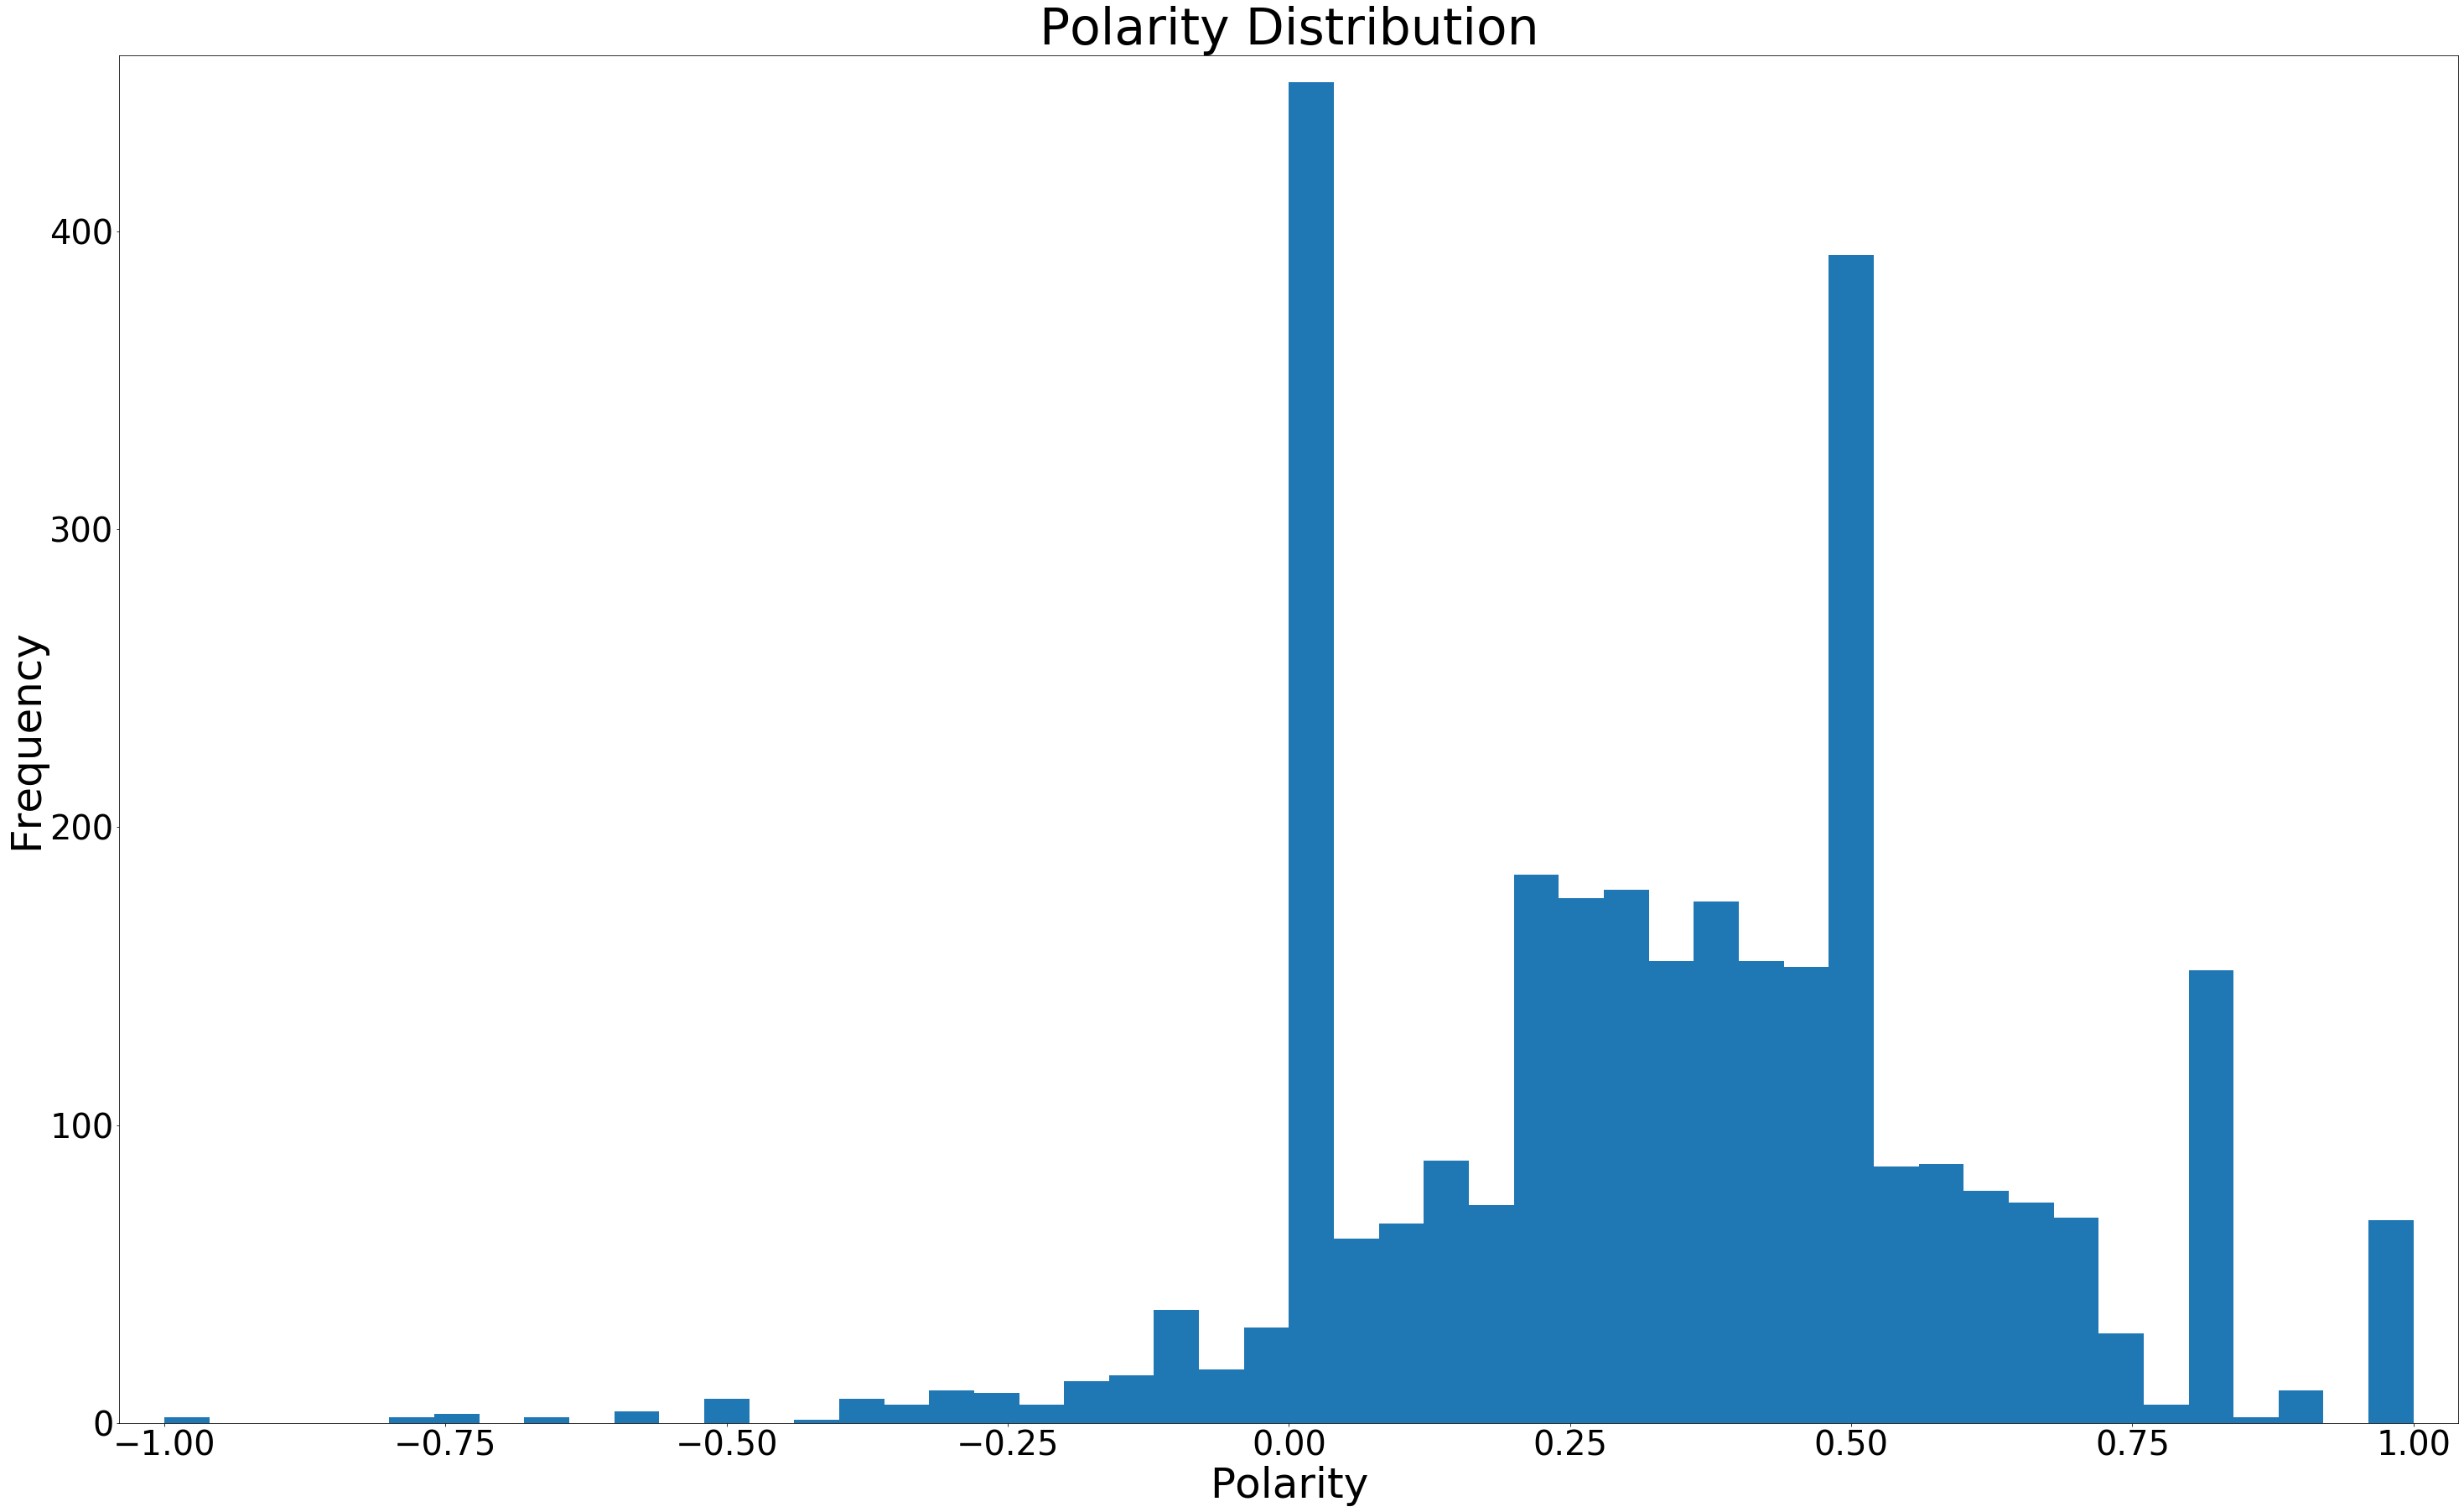

In [344]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Polarity', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['ploarity'], bins=50)
plt.title('Polarity Distribution', fontsize=60)
plt.show()


In [345]:
# Find the number of tweets of each category of polarity (Positive, Negative and Neutral)

In [346]:
# Encode polarity into 'positive', 'negative' and 'neutral' based on the score
df['polarity_encoded'] = ['positive' if x > 0 else 'negative' if x < 0 else 'neutral' for x in df['ploarity']]

In [347]:
df['polarity_encoded'].value_counts()

positive    2544
neutral      428
negative     181
Name: polarity_encoded, dtype: int64

In [350]:
df[df.verified_reviews=="It definitely has better speakers than Eco Dot Gen2 and Google Home Mini, but sound recognition is very poor compared to Google Home Mini or even previous Eco Dot. But Update as on 27th April 2019: Software has gone from bad to worst. It plays certain songs again and again, doesn't let you skip. Recognition has also gone from bad to worst, you have to yell for Alexa to understand what you want it to do only for it to tell you it doesn't understand what you said. And expect no support from Amazon about eco devices, it's very bad. due to it's poor recognition, it takes a lot of time, sometimes even minutes and does nothing... Which definitely takes away the experience. Unfortunately I can't return it... But I think Google Home Mini is miles ahead and better with all the new updates to Google Assistant (Sleep assist and stuff). Maybe it has something to do with cost cutting and Amazon going with only 4 far field microphones instead of 7."]

,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,sentiment_score,ploarity,polarity_encoded
3152,4,2018-07-29,Black Dot,It definitely has better speakers than Eco Dot...,1,definitely better speakers Eco Dot Gen2 Google...,definitely better speakers eco dot gen2 google...,definit better speaker eco dot gen2 googl home...,definit bet speak eco dot gen2 googl hom min s...,definit better speaker eco dot gen2 googl home...,definitely better speaker eco dot gen2 google ...,d e f i n i t e l y b e t t e r s p e a k ...,"(-0.2467231842231842, 0.6426467051467052)",-0.246723,negative


In [349]:
df.head()


,rating,date,variation,verified_reviews,feedback,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancaster),stemmedtext(snowball),lemmatext,lemma_str,sentiment_score,ploarity,polarity_encoded
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,Love Echo,love echo,love echo,lov echo,love echo,love echo,l o v e e c h o,"(0.5, 0.6)",0.500000,positive
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,Loved,loved,love,lov,love,loved,l o v e d,"(0.7, 0.8)",0.700000,positive
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...,sometimes playing game answer question correct...,sometim play game answer question correctli al...,sometim play gam answ quest correct alex say g...,sometim play game answer question correct alex...,sometimes playing game answer question correct...,s o m e t i m e s p l a y i n g g a m e ...,"(0.0, 0.65625)",0.000000,neutral
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learns dinosaurs contro...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learn dinosa control li...,lot fun thing 4 yr old learn dinosaur control ...,lot fun thing 4 yr old learns dinosaur control...,l o t f u n t h i n g 4 y r o l d ...,"(0.2333333333333333, 0.48333333333333334)",0.233333,positive
4,5,2018-07-31,Charcoal Fabric,Music,1,Music,music,music,mus,music,music,m u s i c,"(0.0, 0.0)",0.000000,neutral
